# **Análisis de Ventas y Factores de Éxito en Videojuegos**

En este proyecto se analizarán los datos de la tienda en línea **Ice**, que incluyen ventas históricas, géneros, plataformas y puntuaciones de usuarios y críticos de los videojuegos.

# Propósito del Proyecto:

El objetivo de este proyecto es identificar patrones que permitan estimar la probabilidad de éxito de un videojuego, con el fin de detectar proyectos con potencial y optimizar campañas publicitarias.

# Plan de Trabajo:

Se trabajará con un conjunto de datos de videojuegos del 2016 que contiene información sobre nombre, plataforma, año de lanzamiento, género, ventas en distintas regiones (NA, UE, JP, otros), puntuaciones de usuarios y críticos así como la clasificación de ESRB.

El proceso de análisis se desarrollará en las siguientes etapas:

#### 1. **Preparación de los datos**
- Limpieza y transformación de columnas
- Conversión de tipo de datos
- Tratamiento de valores ausentes y casos especiales como "TBD"
- Cálculo de las ventas totales globales 
    
#### 2. **Análisis exploratorio** 
- Distribución de lanzamientos por año y relevancia de los periodos.
- Ventas por plataforma y evolución en el tiempo
- Identificación de plataformas líderes y con potencial de crecimiento
- Relación entre puntuación (usuarios y críticos) y ventas
- Análisis por género y rentablidad relativa

#### 3. **Perfil de usuario por región**
- Identificación de las principales plataformas y géneros en NA, UE y JP
- Evaluación del impacto del rating ESRB en cada mercado

#### 4. **Pruebas estadísticas**
- Contraste de hipótesis sobre calificaciones promedio entre Xbox One y PC
- Comparación entre los géneros Acción y Deportes

#### 5. **Conclusiones**    
- Resumen de hallazgos clave
- Propuestas de optimización de campañas publicitarias en 2017

# Diccionario de Datos:

**videogames**: ``/datasets/games.csv``: La tabla de datos de videojuegos 2016
- `name`: nombre del videojuego
- `platform`: nombre de la consola
- `year_of_release`: año en que fue lanzado
- `genre` : género del videojuego
- `na_sales` : ventas en Norteamérica en millones de dólares estadounidenses
- `eu_sales` : ventas en Europa en millones de dólares estadounidenses
- `jp_sales` : ventas en Japón en millones de dólares estadounidenses
- `other_sales` : ventas en otros países en millones de dólares estadounidenses
-  `total_sales` : ventas totales globales en millones de dólares estadounidenses
- `critic_score` : puntuación de críticos (máximo de 100)
- `user_score` : puntuación de usuarios (máximo de 10)
- `rating` : Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento)

# Inicialización:

**En esta sección se importan las librerías necesarias y se carga la base de datos `/datasets/games.csv`. Posteriormente se comprueba la estructura de la tabla con `.info()` y se revisan las primeras filas con `.head()`**

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns

## Cargar Datos

In [2]:
# Cargar la tabla de datos en una ruta de archivo

videogames = pd.read_csv('../data/games.csv')


## Preparar los Datos

In [3]:
# Imprimir .info() y las primeras filas de la tabla

videogames.info()
print()
print()
print(videogames.head())

<class 'pandas.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  str    
 1   Platform         16715 non-null  str    
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  str    
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  str    
 10  Rating           9949 non-null   str    
dtypes: float64(6), str(5)
memory usage: 1.4 MB


                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2          

## Limpieza y transformación de columnas, Conversión de tipo de datos y Tratamiento de valores ausentes y casos especiales como "TBD"



Se unificarán los nombres de las columnas a minúsculas, se identificarán los valores ausentes y se ajustarán los tipos de datos: 
- `year_of_release` se convertirá a `Int64`. Se trata de valores discretos anuales que puede contener valores nulos.
- `user_score` se convertirá a `float64`. Los valores incluyen decimales y permite valores NAN.


Tratamiento de valores ausentes:

Se identificaron valores faltantes en las columnas `name, year_of_release, genre, critic_score, user_score y rating`. En el caso de las columnas `name y genre` los valores ausentes se reemplazarán por el string `'Unknown'`, ya que no afecta cálculos estadísticos. En cambio, para las demás columnas (`year_of_release, critic_score, user_score y rating`) se conservarán tal cual los valores nulos, ya que establecerlos con medidas de tendencia central alteraría la distribución original y afectaría su interpretación. En el caso particular de la columna `user_score` se aplicará `pd.to_numeric(errors='coerce')` para convertir a valores nulos aquellas entradas no numéricas, como "TBD".



In [4]:
# unificar nombres de columnas a minúsculas
videogames.columns = videogames.columns.str.lower()
print(videogames.columns)

# valores ausentes
videogames[['name', 'genre']] = videogames[['name', 'genre']].fillna('Unknown')

# convertir tipos de datos
videogames['year_of_release'] = pd.to_numeric(videogames['year_of_release'], errors='coerce').astype('Int64')
videogames['user_score'] = pd.to_numeric(videogames['user_score'], errors='coerce').astype('float64')

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='str')


## Cálculo de las ventas totales globales

In [5]:
# agregar columna de ventas totales

videogames['total_sales'] = (videogames['na_sales'] 
                            + videogames['eu_sales'] 
                            + videogames['jp_sales']
                            + videogames['other_sales'])

videogames = videogames[['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'total_sales', 'critic_score', 'user_score', 'rating']]


videogames.info()
print()
print(videogames.head())

<class 'pandas.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  str    
 1   platform         16715 non-null  str    
 2   year_of_release  16446 non-null  Int64  
 3   genre            16715 non-null  str    
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   total_sales      16715 non-null  float64
 9   critic_score     8137 non-null   float64
 10  user_score       7590 non-null   float64
 11  rating           9949 non-null   str    
dtypes: Int64(1), float64(7), str(4)
memory usage: 1.5 MB

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES 

#### En esta etapa se prepararon los datos: se normalizaron los nombres de las columnas, se definieron los tipos de datos adecuados, se gestionaron los valores ausentes de manera diferenciada (`name y genre con 'Unknown'` y conservando `NaN` en las demás para no alterar la información) y se añadió la columna `total_sales`que concentra las ventas globales.

# Análisis Exploratorio

## Distribución de lanzamientos por año y relevancia de los periodos

Cuántos juegos fueron lanzados en distintos años para determinar la relevancia de los datos en cada período.

    year_of_release  games_per_year
27             2007            1197
28             2008            1427
29             2009            1426
30             2010            1255
31             2011            1136


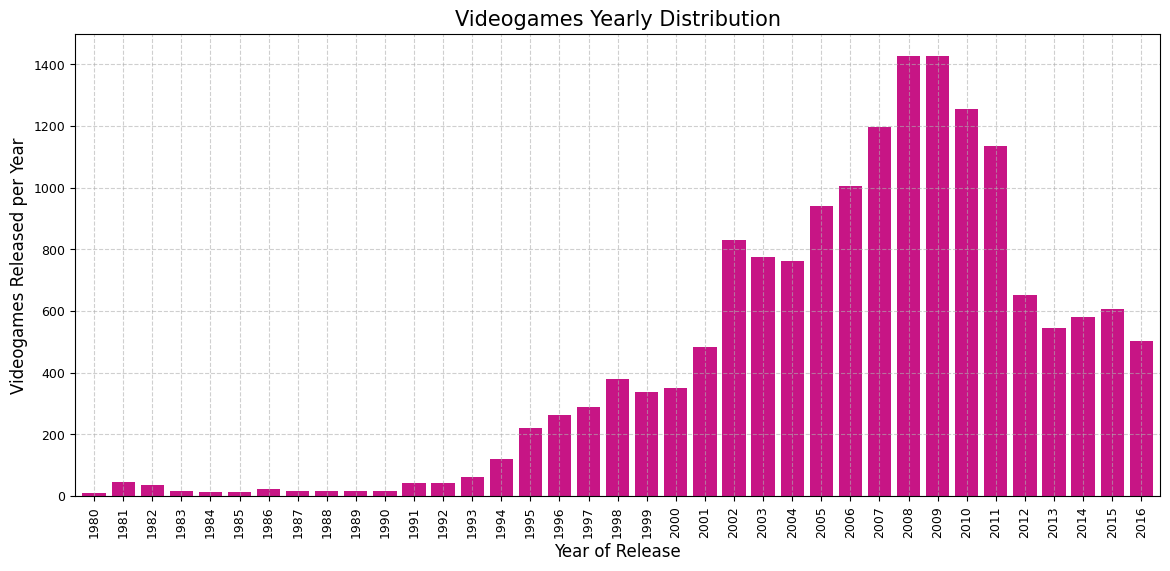

In [6]:
# Distribución de lanzamiento de juegos por año

yearly_games = videogames.groupby('year_of_release')['name'].count().reset_index()
yearly_games.rename(columns={'name':'games_per_year'}, inplace=True)

print(yearly_games[yearly_games['year_of_release']>2006].head())

# Relevancia de periodos

yearly_games.plot(
    kind='bar', 
    x='year_of_release', 
    y='games_per_year', 
    color='mediumvioletred', 
    width=.8, 
    figsize=(14,6))


plt.xlabel('Year of Release', fontsize=12)
plt.ylabel('Videogames Released per Year', fontsize=12)
plt.title('Videogames Yearly Distribution', fontsize=15)
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.legend().remove()
plt.xticks(fontsize=9, rotation=90)
plt.yticks(fontsize=9)
plt.show()



Los datos de cada periodo son significativos porque muestran la evolución y los cambios en la industria. Por ejemplo, entre el 2007 y 2011 se observa el punto más alto con entre 1,100 y 1,500 lanzamientos anuales, lo que refleja un momento de máxima expansión de la industria de los videojuegos. En contraste, los periodos anteriores (80s y 90s), muestran una producción más limitada, lo que indica un crecimiento progresivo del mercado. A partir del 2012 aunque el número de lanzamientos disminuye, se marca el inicio de una etapa de consolidación.

## Ventas por plataforma y evolución en el tiempo

- Cómo varían las ventas totales de las diferentes plataformas y cuáles son aquellas con mayores ventas. 

- Cuáles plataformas fueron populares en el pasado pero dejaron de generar ventas, así como la dinámica de aparición y desaparición de nuevas y antiguas plataformas.

platform             DS     PS2     PS3     Wii    X360
year_of_release                                        
2001                NaN  166.43     NaN     NaN     NaN
2002                NaN  205.38     NaN     NaN     NaN
2003                NaN  184.31     NaN     NaN     NaN
2004              17.27  211.81     NaN     NaN     NaN
2005             130.14  160.66     NaN     NaN    8.25
2006             119.81  103.42   20.96  137.15   51.62
2007             146.94   75.99   73.19  152.77   95.41
2008             145.31   53.90  118.52  171.32  135.26
2009             119.54   26.40  130.93  206.97  120.29
2010              85.02    5.64  142.17  127.95  170.03
2011              26.18    0.45  156.78   59.65  143.84
2012              11.01     NaN  107.36   21.71   99.74
2013               1.54     NaN  113.25    8.59   88.58
2014                NaN     NaN   47.76    3.75   34.74
2015                NaN     NaN   16.82    1.14   11.96
2016                NaN     NaN    3.60    0.18 

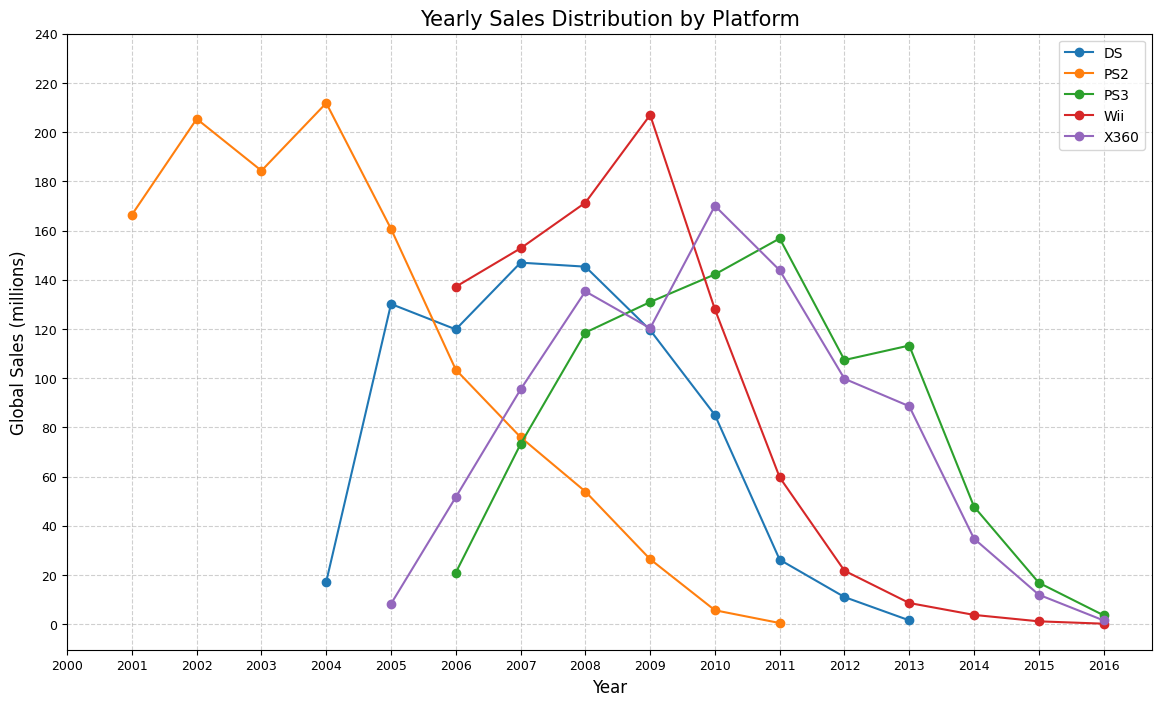

In [7]:
# Ventas totales por plataforma
platform_sales = videogames.groupby('platform')['total_sales'].sum().reset_index()
platform_sales= platform_sales.sort_values('total_sales', ascending=False).head(10)

# top consolas
top_platforms= platform_sales['platform'].head(5)

# filtrar plataformas
platform_yearly = videogames[videogames['platform'].isin(top_platforms)]

# Agrupar ventas por plataforma y año
platform_yearly = platform_yearly.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
platform_yearly = platform_yearly[platform_yearly['year_of_release'] > 2000]

# crear pivot table
pivot_top_platforms = platform_yearly.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum')

print(pivot_top_platforms)
print()
print()

# graficar
pivot_top_platforms.plot(style='o-', 
    figsize=(14,8))
plt.xlabel('Year', fontsize=12)
plt.ylabel('Global Sales (millions)', fontsize=12)
plt.title('Yearly Sales Distribution by Platform', fontsize=15)
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.legend(['DS', 'PS2', 'PS3', 'Wii', 'X360'])
plt.xticks(np.arange(2000,2017,1), fontsize=9, rotation=0)
plt.yticks(np.arange(0,260,20), fontsize=9)
plt.show()




En promedio, las plataformas tardan alrededor de 4 años en alcanzar su pico de ventas después de salir al mercado. Consolas como la PS2, la Wii y la DS
llegaron a su máximo más rápidamente (~3 años), mientras que la PS3 y la Xbox360 lo hicieron de forma más lenta, en 5 años aproximadamente. 

En cuanto a la desaparición, el gráfico muestra que las plataformas suelen mantenerse con ventas relevantes durante 9 y 10 años antes de que sus cifras caigan prácticamente a cero. 

## Identificación de plataformas líderes y con potencial de crecimiento

Se deben tomar los datos del periodo 2012-2016, ya que representan la etapa más reciente de la indsutria y son lo más adecuado para constuir un modelo que prediga 2017. Los años anteriores muestran tendencias útiles para análisis histórico pero no reflejan el estado actual del mercado.

platform           3DS     PS3     PS4   X360   XOne
year_of_release                                     
2012             51.36  107.36     NaN  99.74    NaN
2013             56.57  113.25   25.99  88.58  18.96
2014             43.76   47.76  100.00  34.74  54.07
2015             27.78   16.82  118.90  11.96  60.14
2016             15.14    3.60   69.25   1.52  26.15




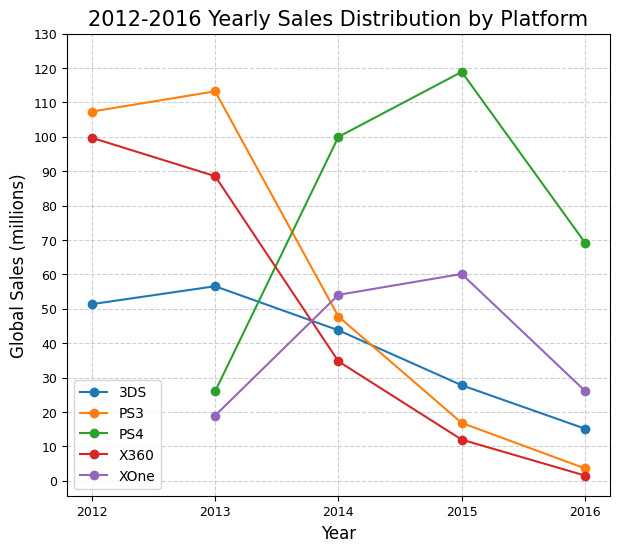

In [8]:
# periodo 2012 - 2016

recent_data = videogames[(videogames['year_of_release'] >= 2012) &
    (videogames['year_of_release'] <= 2016)]


# ventas totales por plataforma 
recent_platform_sales = recent_data.groupby('platform')['total_sales'].sum().reset_index().sort_values('total_sales', ascending=False)

# top consolas 
top_recent_platforms = recent_platform_sales['platform'].head(5)

# filtrar por plataformas
recent_platform_yearly = recent_data[recent_data['platform'].isin(top_recent_platforms)]

# Agrupar ventas por plataforma y año 
recent_platform_yearly = recent_platform_yearly.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Crear pivot table
pivot_recent_top_plt = recent_platform_yearly.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum')
print(pivot_recent_top_plt)
print()
print()

# graficar
pivot_recent_top_plt.plot(style='o-', figsize=(7,6))
plt.xlabel('Year', fontsize=12)
plt.ylabel('Global Sales (millions)', fontsize=12)
plt.title('2012-2016 Yearly Sales Distribution by Platform', fontsize=15)
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.legend(['3DS', 'PS3', 'PS4', 'X360', 'XOne'])
plt.xticks(np.arange(2012,2017,1), fontsize=9, rotation=0)
plt.yticks(np.arange(0,140,10), fontsize=9)
plt.show()

Se observa que las plataformas líderes en ventas entre 2012 y 2016 fueron **3DS, PS3, PS4, X360 Y XOne**. Sin embargo, tanto PS3 como X360 alcanzaron casi 0 ventas en el 2016, lo que indica su salida del mercado.
La PS4, a pesar de mostrar una ligera disminución hacia 2016, sigue consolidada como la plataforma con mayor potencial de crecimiento. Por otro lado, XOne y 3DS aún mantienen volúmenes de ventas significativos (superiores a 15 millones), lo que muestra que siguen siendo relevantes.
En conclusión, las plataformas potencialmente rentables para 2017 serían PS4, XOne y 3DS, mientras que PS3 y X360 muestran una clara tendencia a la baja.

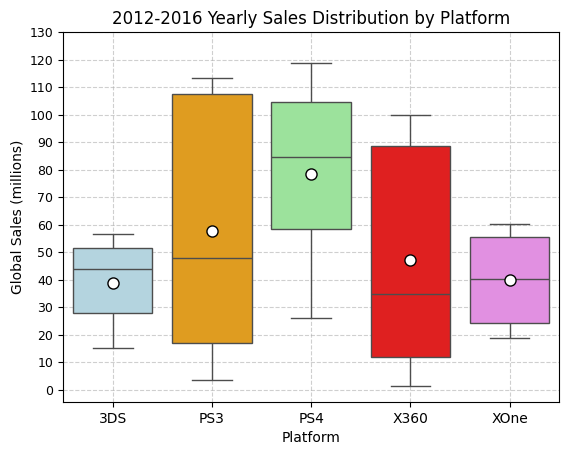

In [9]:
# Diagrama de caja
sns.boxplot(data=pivot_recent_top_plt, 
            palette=['lightblue', 'orange', 'lightgreen', 'red', 'violet'], 
            showmeans=True,  
            meanprops={"marker":"o",
               "markerfacecolor":"white",
               "markeredgecolor":"black",
               "markersize":"8"})

plt.title('2012-2016 Yearly Sales Distribution by Platform')
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.xlabel('Platform')
plt.ylabel('Global Sales (millions)')
plt.yticks(np.arange(0,140,10), fontsize=9)
plt.show()



Las diferencias en las ventas globales entre plataformas son significativas. La PS4 muestra las cifras más altas en promedio, aunque con bastante variabilidad, lo que coincide con el auge en las ventas alrededor del 2015.
La PS3 y la X360, en cambio, presentan una distribución amplia pero con valores en descenso, lo que refleja el declive de estas consolas. 
Por otro lado, la 3DS y la XOne muestran ventas más estables y concentradas, con menor dispersión en comparación con PS4, PS3 y X360. Esto indica que aunque no alcanzan los máximos de las otras consolas, mantienen un desempeño relativamente consistente.
En resumen, mientras que PS4 domina en ventas y está consolidada, PS3 y X360 se encuentran en declive; la 3DS y XOne presentan un comportamiento intermedio con cifras más regulares.


## Relación entre puntuación (usuarios y críticos) y ventas de la plataforma más popular

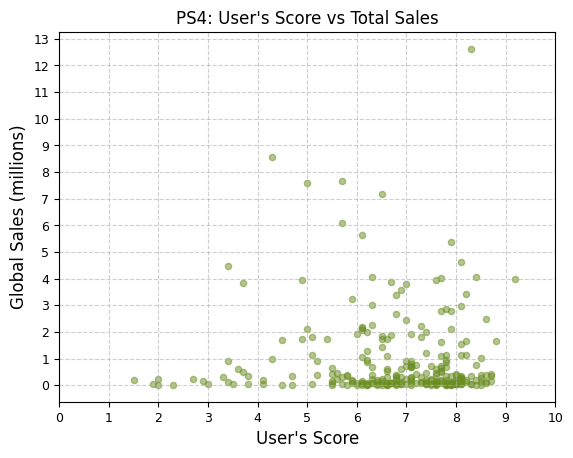


Correlación ventas- puntuación de usuarios (PS4): -0.032





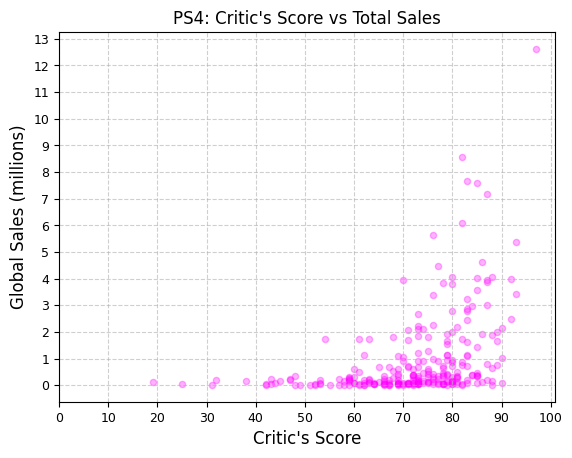


Correlación ventas- puntuación de críticos (PS4): 0.407


In [10]:
# filtrar por plataforma

ps4_recent_data = recent_data[recent_data['platform']=='PS4']

#gráfico de dispersión por puntuación de usuarios
ps4_recent_data.plot(kind='scatter', x='user_score', y='total_sales', alpha=.5, title="PS4: User's Score vs Total Sales", color='olivedrab')
plt.xlabel("User's Score", fontsize=12)
plt.ylabel('Global Sales (millions)', fontsize=12)
plt.xticks(np.arange(0,11,1), fontsize=9)
plt.yticks(np.arange(0,14,1), fontsize=9)
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.show()
print()

# Índice de correlación entre usuarios y ventas
corr_users = ps4_recent_data['total_sales'].corr(ps4_recent_data['user_score'])
print(f"Correlación ventas- puntuación de usuarios (PS4): {corr_users:.3f}")
print()
print()
print()

#gráfico de dispersión por puntuación de críticos
ps4_recent_data.plot(kind='scatter', x='critic_score', y='total_sales', alpha=.3, title="PS4: Critic's Score vs Total Sales", color='fuchsia')
plt.xlabel("Critic's Score", fontsize=12)
plt.ylabel('Global Sales (millions)', fontsize=12)
plt.xticks(np.arange(0,110,10), fontsize=9)
plt.yticks(np.arange(0,14,1), fontsize=9)
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.show()
print()

# Índice de correlación entre críticos y ventas
corr_critics = ps4_recent_data['total_sales'].corr(ps4_recent_data['critic_score'])
print(f"Correlación ventas- puntuación de críticos (PS4): {corr_critics:.3f}")

El primer gráfico muestra la relación entre la puntuación de los usuarios y las ventas globales. La dispersión de los puntos evidencia que no existe una correlación fuerte: incluso los videojuegos con bajas califiaciones alcanzaron un volumen de ventas considerable, mientras que las calificaciones altas no garantizan ventas elevadas. La mayoría de los títulos se concentran en puntuaciones de 7 a 9, con un promedio cercano a 2 millones de dólares vendidos. El coeficiente de correlación es prácticamente nulo (-0.032), lo que confirma la ausencia de una relación lineal clara.

En contraste, el segundo gráfico analiza la relación entre la puntuación de los críticos y las ventas globales. Aquí sí se observa una tendencia más positiva: a medida de que aumenta la califiación de críticos, es más probable encontrar títulos con mayores ventas. El valor de correlación (0.407) respalda esta observación, indicando una correlación positiva moderada entre ambas variables.


## Cómo varían las ventas de un mismo juego entre diferentes plataformas

   platform  total_sales
4       PS4       314.14
3       PS3       135.27
10     XOne       129.36
9      X360       113.67
2        PC        28.52
8      WiiU        12.68
6       PSV        11.85
7       Wii        11.17
0       3DS         5.50
1        DS         0.38
5       PSP         0.35




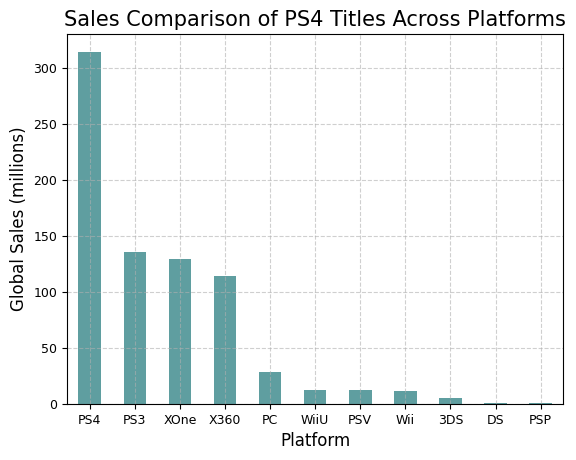

In [11]:
# Filtrar los videojuegos de PS4 en las demás consolas.

platform_videogames = recent_data[recent_data['name'].isin(ps4_recent_data['name'])]


# agrupar por consolas y ventas

group_platform_sales = platform_videogames.groupby('platform')['total_sales'].sum().reset_index().sort_values('total_sales', ascending=False)
print(group_platform_sales)
print()
print()

# graficar

group_platform_sales.plot(kind='bar', x='platform', y='total_sales', color='cadetblue')
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Global Sales (millions)', fontsize=12)
plt.title('Sales Comparison of PS4 Titles Across Platforms', fontsize=15)
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.legend().remove()
plt.xticks(fontsize=9, rotation=0)
plt.yticks(fontsize=9)
plt.show()



Se observa una diferencia notable en las ventas: la mayoría de los juegos analizados fueron diseñados principalmente para PS4, lo que explica el evidente dominio de esta consola y la caía de ventas en el resto de plataformas.

Algunas adaptaciones también llegaron a PS3, X360 y XOne, ambas con cifras relevantes (en conjunto superan los 200 millones). En contraste, plataformas como PC, 3DS y Wii muestran un impacto mucho menor, sin superar los 50 millones de ventas.

En general, esto sugiere que los títulos de PS4 estuvieron enfocados casi exclusicamente a esa consola, con una presencia más limitada en consolas competidoras (Xbox) o en la generación previa de PlayStation (PS3), y con un peso mínimo en el resto del mercado.

## Análisis por género y rentablidad relativa

           genre  total_sales
0         Action       441.12
8        Shooter       304.73
7   Role-Playing       192.80
10        Sports       181.07
3           Misc        85.04
4       Platform        61.00
6         Racing        53.50
2       Fighting        44.49
9     Simulation        35.12
1      Adventure        29.43
11      Strategy        13.34
5         Puzzle         4.89




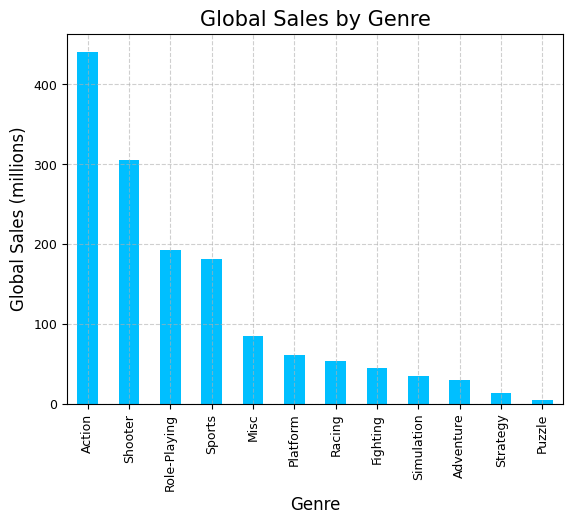

In [12]:
# agrupar por genero y ventas

videogames_genre = recent_data.groupby('genre')['total_sales'].sum().reset_index().sort_values('total_sales', ascending=False)
print(videogames_genre)
print()
print()

# graficar
videogames_genre.plot(x='genre', y='total_sales', kind='bar', color='deepskyblue')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Global Sales (millions)', fontsize=12)
plt.title('Global Sales by Genre', fontsize=15)
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.legend().remove()
plt.xticks(fontsize=9, rotation=90)
plt.yticks(fontsize=9)
plt.show()

El género con mayores ventas globales es Acción, seguido de Shooter y en tercer lugar, Role-Playing casi empatando con Deportes con una diferencia de ~9 millones. Estos tres géneros concentran gran parte del mercado.

El resto de los géneros muestran ventas más moderadas, aunque Misc destaca con cifras aún relevantes. En contraste, géneros como Aventura, Puzzle y Estrategia, no alcanzan los 100 millones de ventas, lo que los coloca en mercados más pequeños. 

Basado en lo anterior, al planear los próximos lazamientos, conviene priorizar los géneros de Acción, Shooter, Role-Playing y Deportes, sobre todo en plataformas principales como PS4, XOne y 3DS que ya cuentan con una base sólida de usuarios.

En general, los géneros orientados a la acción, competencia e interacción dinámica tienden a registrar ventas más altas, mientras que los géneros más narrativos o de lógica se mantienen en segmentos reducidos.

# Perfil de usuario por región

In [13]:
recent_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,21.05,97.0,8.2,M
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,16.27,97.0,8.1,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,14.60,NaN,NaN,NaN
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,13.79,83.0,5.3,M


## Ventas totales por Región 2012-2016

Total Sales by Region:
         0
NA  590.97
EU  506.82
JP  192.58




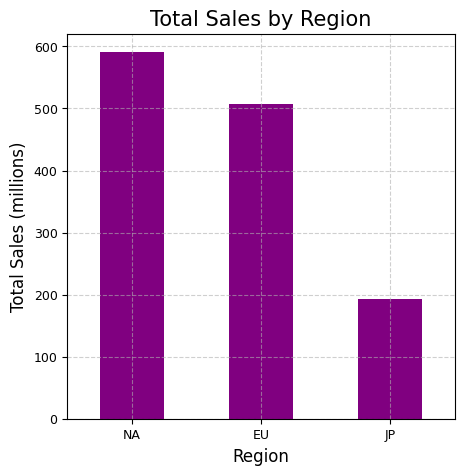

In [14]:
# total de ventas por región

region_sales = {
    'NA': recent_data['na_sales'].sum(),
    'EU': recent_data['eu_sales'].sum(),
    'JP': recent_data['jp_sales'].sum(),}

region_sales_df = pd.DataFrame([region_sales]).T
print('Total Sales by Region:')
print(region_sales_df)
print()
print()

region_sales_df.plot(kind='bar', figsize=(5,5), color='purple')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales (millions)', fontsize=12)
plt.title('Total Sales by Region', fontsize=15)
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.legend().remove()
plt.xticks(fontsize=9, rotation=0)
plt.yticks(np.arange(0,700,100),fontsize=9)
plt.show()

Se observa que Norteamérica y Europa concentran la mayor parte de las ventas globales, lo que justifica una mayor inversión en campañas promocionales de gran alcance en estas regiones. Japón, aunque representa un mercado más reducido, demanda estrategias locales focalizadas en sus preferencias particulares.

## Plataformas principales por Región 2012-2016

Top Platforms in North America:
   platform  na_sales
9      X360    140.05
4       PS4    108.74
3       PS3    103.38
10     XOne     93.12
0       3DS     55.31



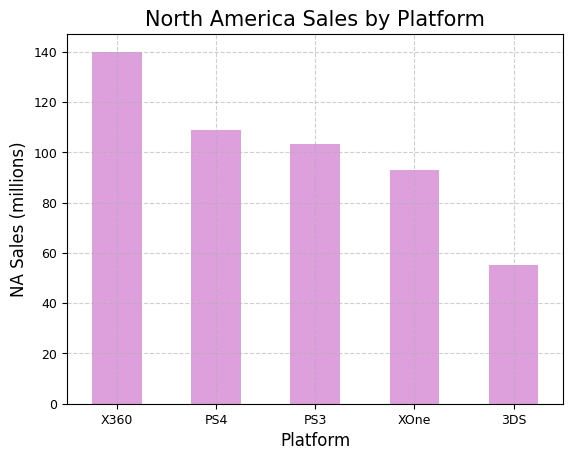



Top Platforms in North Europe:
   platform  eu_sales
4       PS4    141.09
3       PS3    106.86
9      X360     74.52
10     XOne     51.59
0       3DS     42.64



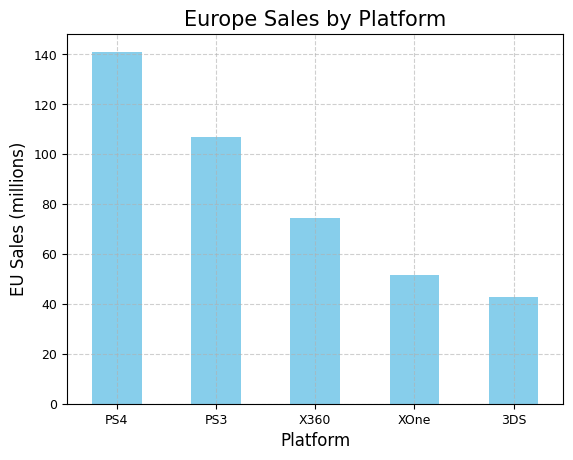



Top Platforms in Japan:
  platform  jp_sales
0      3DS     87.79
3      PS3     35.29
6      PSV     21.04
4      PS4     15.96
8     WiiU     13.01



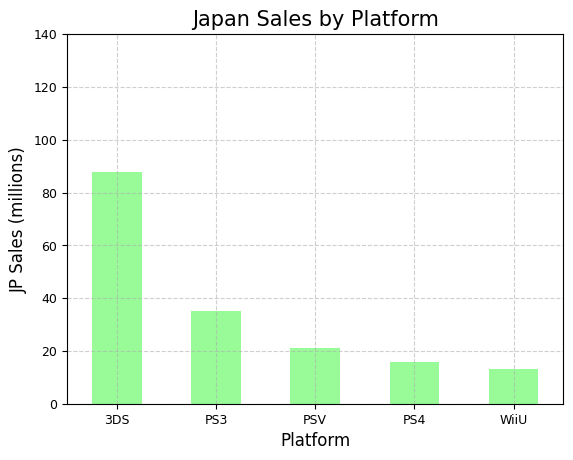



Top Global Platforms:
  platform  na_sales  eu_sales  jp_sales
0      3DS     55.31     42.64     87.79
1      PS3    103.38    106.86     35.29
2      PS4    108.74    141.09     15.96
3      PSV       NaN       NaN     21.04
4     WiiU       NaN       NaN     13.01
5     X360    140.05     74.52       NaN
6     XOne     93.12     51.59       NaN



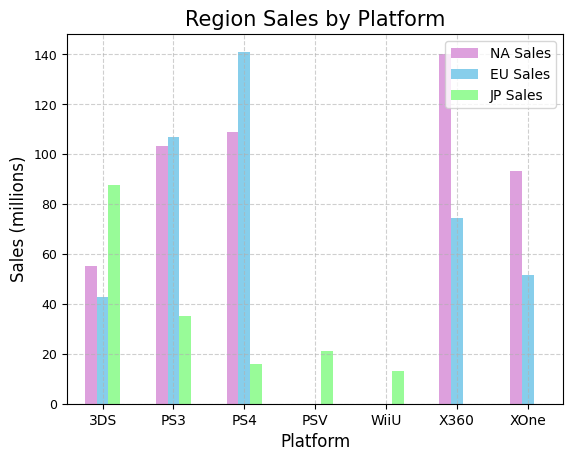

In [15]:
# agrupar por plataforma en Norteamérica
na_platforms = recent_data.groupby('platform')['na_sales'].sum().reset_index().sort_values('na_sales', ascending=False)

# top plataformas NA
top_na_platforms = na_platforms.head(5)
print("Top Platforms in North America:")
print(top_na_platforms)
print()

# graficar NA
top_na_platforms.plot(kind='bar', x='platform', y='na_sales', color='plum')
plt.xlabel('Platform', fontsize=12)
plt.ylabel('NA Sales (millions)', fontsize=12)
plt.title('North America Sales by Platform', fontsize=15)
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.legend().remove()
plt.xticks(fontsize=9, rotation=0)
plt.yticks(np.arange(0,160,20), fontsize=9)
plt.show()
print()
print()


# agrupar por plataforma en Europa
eu_platforms = recent_data.groupby('platform')['eu_sales'].sum().reset_index().sort_values('eu_sales', ascending=False)

# top plataformas EU
top_eu_platforms = eu_platforms.head(5)
print("Top Platforms in North Europe:")
print(top_eu_platforms)
print()

# graficar EU
top_eu_platforms.plot(kind='bar', x='platform', y='eu_sales', color='skyblue')
plt.xlabel('Platform', fontsize=12)
plt.ylabel('EU Sales (millions)', fontsize=12)
plt.title('Europe Sales by Platform', fontsize=15)
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.legend().remove()
plt.xticks(fontsize=9, rotation=0)
plt.yticks(np.arange(0,160,20), fontsize=9)
plt.show()
print()
print()


# agrupar por plataforma en Japón
jp_platforms = recent_data.groupby('platform')['jp_sales'].sum().reset_index().sort_values('jp_sales', ascending=False)

# top plataformas JP
top_jp_platforms = jp_platforms.head(5)
print("Top Platforms in Japan:")
print(top_jp_platforms)
print()

# graficar JP
top_jp_platforms.plot(kind='bar', x='platform', y='jp_sales', color='palegreen')
plt.xlabel('Platform', fontsize=12)
plt.ylabel('JP Sales (millions)', fontsize=12)
plt.title('Japan Sales by Platform', fontsize=15)
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.legend().remove()
plt.xticks(fontsize=9, rotation=0)
plt.yticks(np.arange(0,160,20), fontsize=9)
plt.show()
print()
print()


# juntar global platforms
top_global_platforms = top_na_platforms.merge(top_eu_platforms, on='platform', how='outer')
top_global_platforms = top_global_platforms.merge(top_jp_platforms, on='platform', how='outer')
print("Top Global Platforms:")
print(top_global_platforms)
print()

#graficar plataformas globales
top_global_platforms.plot(kind='bar', x='platform', color=['plum','skyblue','palegreen'])
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Sales (millions)', fontsize=12)
plt.title('Region Sales by Platform', fontsize=15)
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.legend(['NA Sales', 'EU Sales', 'JP Sales'], loc='upper right')
plt.xticks(fontsize=10, rotation=0)
plt.yticks(np.arange(0,160,20),fontsize=9)
plt.show()


### Resumen:

**Norteamérica**:
- El gráfico muestra que en Norteamérica la Xbox 360 lidera el mercado, seguida por la PS4. Las consolas PS3, Xbox One y 3DS también alcanzan volúmenes importantes, todas superando los 50 millones en ventas. Esto sugiere enfocar las campañas publicitarias principalmente en la familia Xbox, con un papel secundario para PlayStation y sin dejar de lado al Nintendo 3DS, que mantiene una presencia relevante.

**Europa**:
- En Europa, la PS4 domina claramente el mercado, seguida de la PS3. Las consolas de la familia Xbox (X360 y XOne) mantienen participación considerable y el 3DS se ubica en último lugar. Esto refleja un fuerte apego hacia la familia PlayStation, por lo que las campañas deben centrarse en estas consolas, anque también conviene incluir estrategias dirigidas a Xbox y de manera complementaria, al 3DS si se busca incrementar sus ventas.

**Japón:**
- En Japón, el panorama cambia significativamente: el Nintendo 3DS lidera con gran ventaja, seguido por la PS3, Playstation Vita(PSV), PS4 y finalmente la WiiU. Esto evidencia la preferencia del mercado japonés por la familia Nintendo, con un rol importante también para Playstation. En consecuencia, las campañas de esta región deben enfocarse principalmente en Nintendo y en segundo plano, en Playstation.

**Comparativa Global:**
- El análisis muestra que cada región tiene un líder distinto: en Norteamérica predomina Xbox, en Europa PlayStation y en Japón Nintendo. Asimismo, se observa que mientras algunas plataformas resultan muy relevantes en ciertas regiones, en otras prácticamente no figuran. Este contraste confirma que no existe un mercado uniforme, por lo que las campañas de marketing deben adaptarse a las preferencias locales, priorizando las consolas líderes en cada región y sin descuidar aquellas plataformas secundarias que mantienen ventas significativas. No obstante, plataformas como PS4, PS3 y 3DS muestran alcance consistente en las tres regiones, lo que las convierte en buenos candidatos para campañas globales complementarias.

## Géneros Principales por Región 2012-2016

Top Genres North America:
           genre  na_sales
0         Action    177.84
8        Shooter    144.77
10        Sports     81.53
7   Role-Playing     64.00
3           Misc     38.19



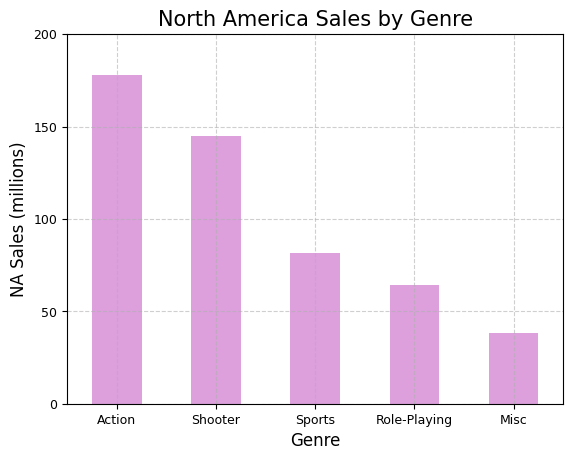



Top Genres Europe:
           genre  eu_sales
0         Action    159.34
8        Shooter    113.47
10        Sports     69.09
7   Role-Playing     48.53
6         Racing     27.29



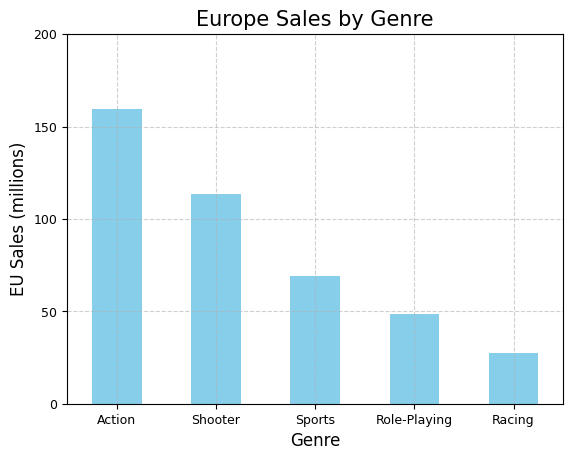



Top Genres Japan:
          genre  jp_sales
7  Role-Playing     65.44
0        Action     52.80
3          Misc     12.86
9    Simulation     10.41
2      Fighting      9.44



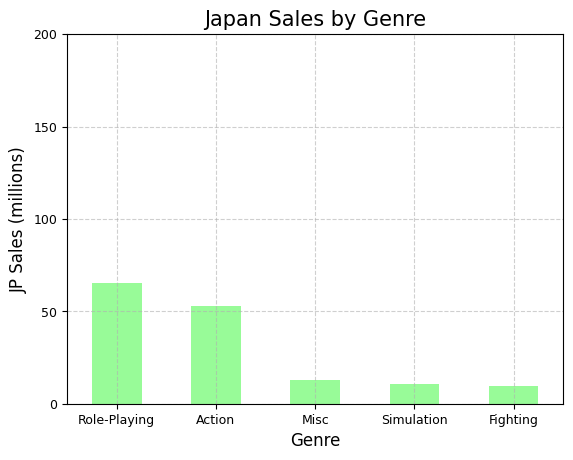



Top Global Genres:
          genre  na_sales  eu_sales  jp_sales
0        Action    177.84    159.34     52.80
1      Fighting       NaN       NaN      9.44
2          Misc     38.19       NaN     12.86
3        Racing       NaN     27.29       NaN
4  Role-Playing     64.00     48.53     65.44
5       Shooter    144.77    113.47       NaN
6    Simulation       NaN       NaN     10.41
7        Sports     81.53     69.09       NaN



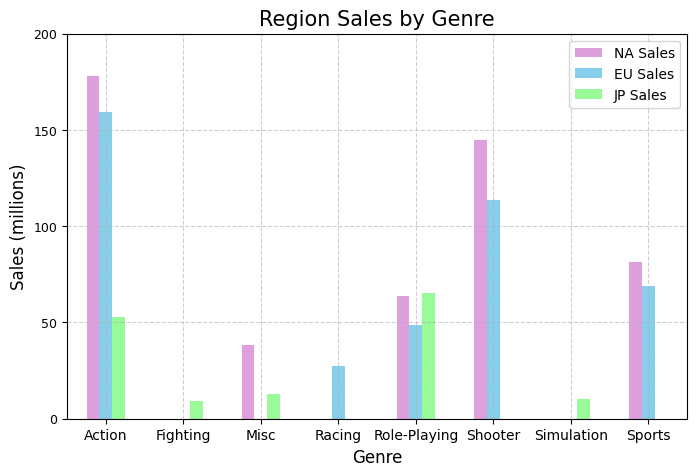

In [16]:
# agrupar por género en Norteamérica 
na_genre = recent_data.groupby('genre')['na_sales'].sum().reset_index().sort_values('na_sales', ascending=False)

# top plataformas NA
top_na_genre = na_genre.head(5)
print("Top Genres North America:")
print(top_na_genre)
print()

# graficar NA
top_na_genre.plot(kind='bar', x='genre', y='na_sales', color='plum')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('NA Sales (millions)', fontsize=12)
plt.title('North America Sales by Genre', fontsize=15)
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.legend().remove()
plt.xticks(fontsize=9, rotation=0)
plt.yticks(np.arange(0,250,50), fontsize=9)
plt.show()
print()
print()



# agrupar por género en Europa 
eu_genre = recent_data.groupby('genre')['eu_sales'].sum().reset_index().sort_values('eu_sales', ascending=False)

# top plataformas EU
top_eu_genre = eu_genre.head(5)
print("Top Genres Europe:")
print(top_eu_genre)
print()

# graficar EU
top_eu_genre.plot(kind='bar', x='genre', y='eu_sales', color='skyblue')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('EU Sales (millions)', fontsize=12)
plt.title('Europe Sales by Genre', fontsize=15)
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.legend().remove()
plt.xticks(fontsize=9, rotation=0)
plt.yticks(np.arange(0,250,50), fontsize=9)
plt.show()
print()
print()


# agrupar por género en Japón
jp_genre = recent_data.groupby('genre')['jp_sales'].sum().reset_index().sort_values('jp_sales', ascending=False)

# top plataformas JP
top_jp_genre = jp_genre.head(5)
print("Top Genres Japan:")
print(top_jp_genre)
print()

# graficar JP
top_jp_genre.plot(kind='bar', x='genre', y='jp_sales', color='palegreen')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('JP Sales (millions)', fontsize=12)
plt.title('Japan Sales by Genre', fontsize=15)
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.legend().remove()
plt.xticks(fontsize=9, rotation=0)
plt.yticks(np.arange(0,250,50), fontsize=9)
plt.show()
print()
print()


# juntar generos globales
top_global_genres = top_na_genre.merge(top_eu_genre, on='genre', how='outer')
top_global_genres = top_global_genres.merge(top_jp_genre, on='genre', how='outer')
print("Top Global Genres:")
print(top_global_genres)
print()

# graficar géneros globales
top_global_genres.plot(kind='bar', x='genre',color=['plum','skyblue','palegreen'], figsize=(8,5))
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Sales (millions)', fontsize=12)
plt.title('Region Sales by Genre', fontsize=15)
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.legend(['NA Sales', 'EU Sales', 'JP Sales'], loc='upper right')
plt.xticks(fontsize=10, rotation=0)
plt.yticks(np.arange(0,250,50),fontsize=9)
plt.show()



### Resumen:

**Norteamérica**:
- El género líder es Acción, seguido de Shooter. Géneros como Sports y Role-Playing también superan los 50 millones de ventas, mientras que Misc alcanza cerca de 40 millones. Esto sugiere campañas publicitarias enfocadas principalmente en acción con apoyo en los géneros secundarios, sin descuidar Misc si se busca impulsar su crecimiento.

**Europa**:
- En Europa también predomina Acción, seguido de Shooter, Sports y Role-Playing. En último lugar se encuentra Racing con unos 25 millones de ventas. Esto indica que al igual que NorteAmérica, las campañas deben priorizar acción, shooter y deportes, complementadas con refuerzos para Role-Playing y Racing.

**Japón:**
- Aquí el panorama cambia: el género líder es Role-Playing, seguido de Acción. En contraste, Misc, Simulation y Fighting registran ventas bajas. Las campañas deben centrarse principalmente en Role-Playing y acción; para los demás géneros, se requerirán estrategias complementarias.

**Comparativa Global:**
- El análisis muestra que tanto como Norteamérica como Europa dominan los géneros de Acción, Shooter y Deportes, mientras que en Japón el género líder es Role-Playing. Además, se observa que algunos géneros son muy relevantes en ciertas regiones pero poco significativos en otras, lo que refuerza la necesidad de estrategias diferenciadas por mercado. Sin embargo, géneros como Acción y Role-Playing, presentes en las tres regiones, ofrecen la posibilidad de implementar campañas globales complementarias, mientras que Norteamérica y Europa pueden compartir enfoques semejantes por sus similitudes.

## Clasificación de ESRB por Región 2012-2016

**Clasificación de ESRB (Entertainment Software Rating Board):**

E:Everyone (6+) - Apto para todos

E10+:Everyone 10+ - A partir de 10 años

M:Mature (17+) - Para mayores de 17 años

T:Teen (13+) - Para adolescentes


Sales by ESRB:
  rating  na_sales  eu_sales  jp_sales
0      E    114.37    113.03     28.33
1   E10+     75.70     55.37      8.19
2      M    231.57    193.96     21.20
3      T     66.02     52.96     26.02




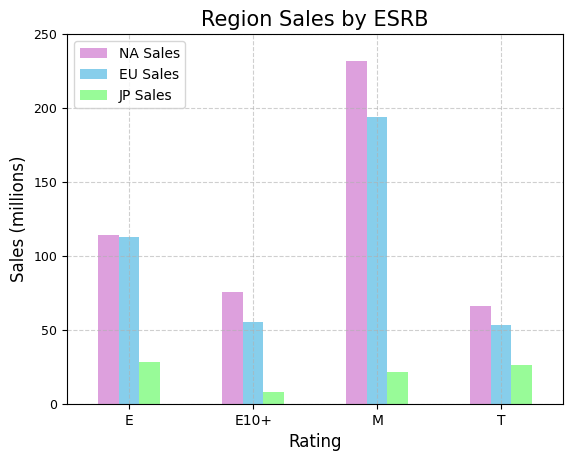

In [17]:
# diccionario de clasificaciones
esrb_dict = {
    "E": "Everyone (6+) - Apto para todos",
    "E10+": "Everyone 10+ - A partir de 10 años",
    "M": "Mature (17+) - Para mayores de 17 años",
    "T": "Teen (13+) - Para adolescentes"
}
print(f"**Clasificación de ESRB (Entertainment Software Rating Board):**")
print()
for clave, valor in esrb_dict.items():
    print(f"{clave}:{valor}\n")
print()


# Agrupar por region y rating
esrb_sales= recent_data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()
print("Sales by ESRB:")
print(esrb_sales)
print()
print()

# graficar
esrb_sales.plot(kind='bar', x='rating', color=['plum','skyblue','palegreen'])
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Sales (millions)', fontsize=12)
plt.title('Region Sales by ESRB', fontsize=15)
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.legend(['NA Sales', 'EU Sales', 'JP Sales'], loc='upper left')
plt.xticks(fontsize=10, rotation=0)
plt.yticks(np.arange(0,300,50),fontsize=9)
plt.show()




### Resumen:

**Norteamérica**:
- Los títulos más vendidos son los de clasificación M (Mature 17+), lo que refleja un mercado enfocado en jóvenes y adultos. En segundo lugar, aparece la clasificación E (Everyone), mientras que E10+ y T (Teen) también superan los 50 millones de ventas. Esto sugiere que las campañas deben dirigirse principalmente a títulos Mature, con estrategias complementarias para los demás segmentos.

**Europa**:
- De forma similar, en Europa predominan los títulos con clasificación M, seguidos de E y en menor medida E10+ y T. Por ello, las estrategias de marketing en esta región pueden asemejarse bastante a las de Norteamérica, priorizando el público joven-adulto, sin dejar de lado los juegos familiares y aptos para todas las edades.

**Japón:**
- En japón el panorama cambia: los juegos más vendidos son los de clasificación E, seguidos de T. En contraste, los títulos M y E10+ tienen una presencia mucho menor. Esto indica un mercado orientado principalmente para un público familiar y adolescente, lo que requiere campañas diferenciadas dirigidas a este segmento, con apoyos secundarios para M y E10+.

**Comparativa Global:**
- El análisis evidencia una clara diferencia entre Occidente (NA y EU) y JApón. Mientras en Occidente dominan los títulos con clasificación M, orientados a público joven-adulto, en Japón lideran los de E y T, más enfocados a audiencias familiares y adolescentes. Esto confirma que no existe un mercado homogéneo y que las estrategias de marketing deben adaptarse a las particularidades culturales y demográficas de cada región, aunque pueden plantearse campañas complementarias basadas en géneros o franquicias que mantienen presencia en las distintas regiones.

# Pruebas estadísticas

## Contraste de hipótesis sobre calificaciones promedio entre Xbox One y PC

In [18]:

# H₀: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas
# H₁: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son las mismas


xbox_data = recent_data[recent_data['platform']== 'XOne'].dropna()
pc_data = recent_data[recent_data['platform']=='PC'].dropna()

alpha_values = [.05, .01]

platforms_results = st.ttest_ind(xbox_data['user_score'], pc_data['user_score'], equal_var=False)

print('p-value', platforms_results.pvalue)

for alpha in alpha_values:
    if platforms_results.pvalue < alpha:
        print(f"Con α={alpha}: Rechazamos H₀")
    else: 
        print(f"Con α={alpha}: No rechazamos H₀")


p-value 0.41668656393474507
Con α=0.05: No rechazamos H₀
Con α=0.01: No rechazamos H₀


**Resumen:**

- **H₀:** No hay diferencia en las calificaciones promedio de los usuarios para las plataformas Xbox One y PC

- **H₁:** Sí hay diferencia en las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son las mismas

- **Resultado:** El valor p-obtenido fue de 0.41668, mucho mayor que los niveles de significancia α = 0.05 y α = 0.01. 

- **Decisión:** Se acepta H₀ y se rechaza H₁.

- **Conclusión:**
No existe evidencia estadística suficiente para afirmar que las calificaciones promedio de los usuarios sean diferentes entre Xbox One y PC. Los jugadores califican de manera similar los juegos en ambas plataformas.

In [19]:
# H₀: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas
# H₁: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes no son las mismas

action_data = recent_data[recent_data['genre']== 'Action'].dropna()
sports_data = recent_data[recent_data['genre']=='Sports'].dropna()

alpha_values = [.05, .01]

genre_results = st.ttest_ind(action_data['user_score'], sports_data['user_score'], equal_var=False)

print('p-value', genre_results.pvalue)

for alpha in alpha_values:
    if genre_results.pvalue < alpha:
        print(f"Con α={alpha}: Rechazamos H₀")
    else: 
        print(f"Con α={alpha}: No rechazamos H₀")

p-value 4.778145125344636e-13
Con α=0.05: Rechazamos H₀
Con α=0.01: Rechazamos H₀


**Resumen:**

- **H₀:** No hay diferencia en las calificaciones promedio de los usuarios para los géneros de Acción y Deportes.

- **H₁:** Sí hay diferencia en las calificaciones promedio de los usuarios para los géneros de Acción y Deportes.

- **Resultado:** El valor p-obtenido fue de 4.7781e-13, mucho menor que los niveles de significancia α = 0.05 y α = 0.01. 

- **Decisión:** Se rechaza H₀ y se acepta H₁.

- **Conclusión:**
Sí existe evidencia estadística suficiente para afirmar que hay variación en las calificaciones promedio de los usuarios entre los géneros de Acción y Deportes. Los jugadores valoran de manera distinta cada género.

# Conclusión:

### Hallazgos clave:

**América:** 
- Género: Acción, Shooter
- Consola: Xbox
- Clasificación: M (Mature 17+)

**Europa:**
- Género: Acción, Shooter
- Consola: Playstation
- Clasificación: M (Mature 17+)

**Japon:**
- Género: RolePlaying
- Consola: Nintendo
- Clasificación: E (Everyone)


### Propuestas de optimización de campañas publicitarias para 2017:

El análisis muestra que las regiones con mayores ventas son Norteamérica y Europa, ambas con fuertes similitudes en los géneros más vendidos y en la clasificación predominante: Acción , Shooter y títulos dirigidos a un público Mature (17+). No obstante, difieren en la plataforma líder, siendo Xbox en Norteamérica y Playstation en Europa. Japón, por su parte, presenta un escenario completamente distinto, con preferencia por juegos de Role-Playing, el dominio de Nintendo y la clasificación Everyone (E), orientada a un público más amplio y familiar.

Estas diferencias evidencian la necesidad de estrategias de marketing diferenciadas por región: en Occidente pueden unificarse campañas basadas en género y clasificaciones comunes, adaptando la publicidad a la consola predominante en cada mercado; mientras que Japón requiere de un enfoque específico acorde a sus preferencias particulares.

En conclusión, dado que el mercado no es homogéneo, el éxito comercial dependerá de combinar campañas segmentadas localmente con una coordinación global que aproveche los puntos de convergencia entre regiones. Para sostener el crecimiento, será imprescindible dar seguimiento continuo a los cambios en géneros, plataformas y clasificaciones, de modo que las campañas se ajusten óptimamente a las dinámicas del mercado.